# Loan approval analysis 貸款審批分析實作
## 資料來源 參考文件
### https://www.kaggle.com/code/bibekrai44/loan-approval-analysis
### https://ithelp.ithome.com.tw/articles/10240494
### https://www.796t.com/content/1542164169.html
### https://medium.com/@PatHuang/%E5%88%9D%E5%AD%B8python%E6%89%8B%E8%A8%98-3-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-label-encoding-one-hot-encoding-85c983d63f87
### https://blog.csdn.net/CherDW/article/details/55813071


## Step1: Importing necessary libraries
##             Importing libraries required for ML

In [1]:
import sklearn
import os
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
#sklearn之LabelEncoder將Label標準化
#LabelEncoder可以將標籤分配一個0—n_classes-1之間的編碼
#將各種標籤分配一個可數的連續編號
from sklearn.preprocessing import LabelEncoder

## Step2: Read dataset

In [3]:
#Loan_ID,Gender性別,Married婚姻,Dependents家屬,Education教育,Self_Employed自僱,ApplicantIncome申請人收入,CoapplicantIncome共同申請人收入,
#LoanAmount貸款金額,Loan_Amount_Term貸款金額期限,Credit_History,Property_Area財產區域==>Urban城市的Rural鄉村的Semiurban半城市,Loan_Status
df=pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 通過資料獲取，我們得到未經處理的特徵資料，這時的特徵資料可能有以下問題：
### <li>存在缺失值：缺失值需要補充。
###  <li>不屬於同一量綱( dimension)：即特徵的計量規格不一樣，不能夠放在一起比較。如米，千米，秒，分鐘等,計算單位不一致
### <li>資訊冗餘：對於某些定量特徵，其包含的有效資訊為區間劃分，例如學習成績，假若只關心“及格”或不“及格”，那麼需要將定量的考分，轉換成“1”和“0”表示及格和未及格。
### <li>定性特徵不能直接使用：某些機器學習演算法和模型只能接受定量特徵(數值)的輸入，那麼需要將定性特徵轉換為定量特徵。
### <li>資訊利用率低：不同的機器學習演算法和模型對資料中資訊的利用是不同的。
### 那麼最好先對資料的整體情況做一個了解,如資料的描述、資料結構、分佈情況、統計、分析正確性、一致性、缺失值、異常值、重複值等

## Step3: Performing Exploratory Data Analysis (EDA) 執行探索性數據分析 (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Step4: 執行資料清理與預處理
###  ①資料預處理。即資料的清洗工作，主要為缺失值、異常值、錯誤值、資料格式、取樣度等問題的處理。
###  ②特徵轉換。即資料轉換，便於讓模型計算處理。
### A）資料常態化處理及彙整

<AxesSubplot:>

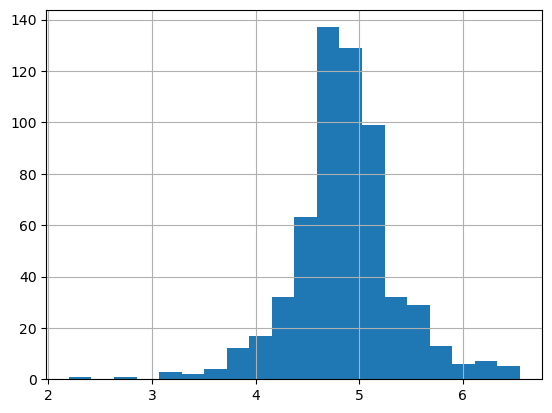

In [9]:
#將離散數值透過log 轉成常態分布，又名高斯分布
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

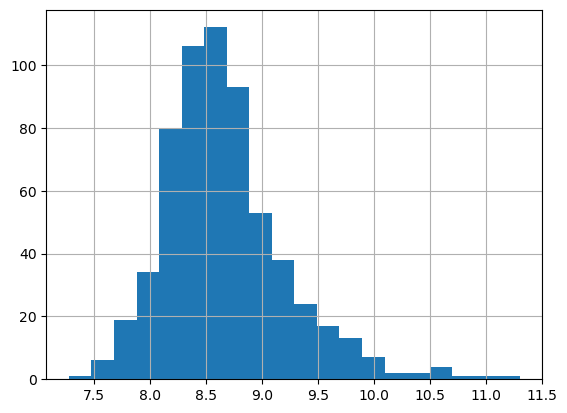

In [10]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome']=np.log(df['TotalIncome'])
df['TotalIncome'].hist(bins=20)

### B）缺失值處理
### 作法:
###    1.缺失值刪除（dropna）
###      ①刪除例項
###      ②刪除特徵
###    2.缺失值填充（fillna）
###      ①用固定值填充, 例如 0，9999， -9999
###      ②用均值填充, 對於數值型的特徵，其缺失值也可以用未缺失資料的均值填充
###      ③用眾數填充,可以用未缺失資料的眾數來填充缺失值 
###      ④用上下資料進行填充, 用前一個數據進行填充 或用後一個數據進行填充 

In [11]:
# fillna ==>用某一個特定值取代所有 nan
# inplace = True：直接对原始对象資料進行修改；
# inplace = False：不動原資料，修改结果放在新建的資料。
# mode()[0]==>眾數，就是出現频数最高的那个值
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log=df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

In [12]:
#Checking if any null values is present or not
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
dtype: int64

In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome'],
      dtype='object')

### C） 選取過濾模型用資料集:選取之後要做成訓練集及測試集的特徵欄位及資料
### 使用 loc函数 or iloc函数

In [14]:
#loc函数：通過欄位名稱,來取得 此欄所有資料 如
df.loc[:,['Loan_ID']]

,Loan_ID
0,LP001002
1,LP001003
2,LP001005
3,LP001006
4,LP001008
...,...
609,LP002978
610,LP002979
611,LP002983
612,LP002984


In [15]:
#loc函数：通過欄位名稱,來取得 此欄部分資料 如
df.loc[:5,['Loan_ID']]

,Loan_ID
0,LP001002
1,LP001003
2,LP001005
3,LP001006
4,LP001008
5,LP001011


In [16]:
#iloc函数：通過欄位index,來取得 此欄所有資料 如
df.iloc[:,[0]]

,Loan_ID
0,LP001002
1,LP001003
2,LP001005
3,LP001006
4,LP001008
...,...
609,LP002978
610,LP002979
611,LP002983
612,LP002984


In [17]:
#iloc函数：通過欄位index,來取得 此欄部分資料 如
df.iloc[:2,[0]]

,Loan_ID
0,LP001002
1,LP001003


### np.r_是水平連接矩陣欄位
### np.c_是垂直連接矩陣欄位

In [18]:
a=[1,2,4]
b=[4,5,6]
np.r_[a,b]

array([1, 2, 4, 4, 5, 6])

In [19]:
np.c_[a,b]

array([[1, 4],
       [2, 5],
       [4, 6]])

In [20]:
np.r_[1:5,9:11,13:15]

array([ 1,  2,  3,  4,  9, 10, 13, 14])

### 抓取特徵欄位及其資料

In [21]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome'],
      dtype='object')

In [22]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
print(x[0])

['Male' 'No' '0' 'Graduate' 360.0 1.0 4.857444178729353 8.674025985443025]


In [23]:
y=df.iloc[:,12].values
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

### D）資料轉換:將類別 (categorical)或是文字(text)的資料轉換成數字
### 做法: Label encoding、 One hot encoding
### Label encoding : 把每個類別 mapping 到某個整數
### One hot encoding: 把每個類別用01編碼
### 範例如下:

In [24]:
import numpy as np
import pandas as pd
country=['Taiwan','Australia','Ireland','Australia','Ireland','Taiwan']

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data_le= labelencoder.fit(country)
data_le.classes_

array(['Australia', 'Ireland', 'Taiwan'], dtype='<U9')

In [25]:
data_let= labelencoder.transform(country)
data_let

array([2, 0, 1, 0, 1, 2])

In [26]:
data_let= labelencoder.fit_transform(country)
data_let

array([2, 0, 1, 0, 1, 2], dtype=int64)

In [27]:
data_letr= labelencoder.inverse_transform(data_let)
data_letr

array(['Taiwan', 'Australia', 'Ireland', 'Australia', 'Ireland', 'Taiwan'],
      dtype='<U9')

In [28]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
data_whole_ohe=onehotencoder.fit_transform(data_let.reshape(-1,1)).toarray()
data_whole_ohe

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 執行資料轉換:將欄位內類別 (categorical)或是文字(text)的資料轉換成數字

In [29]:
Labelencoder_x=LabelEncoder()
Labelencoder_y=LabelEncoder()

In [30]:
print(x[0])
for i in range(0,5):
    x[:,i]=Labelencoder_x.fit_transform(x[:,i])
    x[:,7]=Labelencoder_x.fit_transform(x[:,7])
print(x[0])

['Male' 'No' '0' 'Graduate' 360.0 1.0 4.857444178729353 8.674025985443025]
[1 0 0 0 8 1.0 4.857444178729353 320]


In [31]:
print(y)
y=Labelencoder_y.fit_transform(y)
print(y)

['Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N'
 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y

### E）資料調節與標準化:將特徵值進行調節,將值縮放到一定的範圍,如0~1之間
### 作法1: Standardization 平均&變異數標準化
#### 將所有特徵標準化，也就是高斯分佈。使得數據的平均值為0，變異數(方差)為1。
#### 變異數（英語：variance）又稱方差、變方，描述的是一個隨機變數的離散程度，即一組數字與其平均值之間的距離的度量

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
X_scaled = scaler.transform(x)
print(X_scaled)

[[ 4.72342640e-01 -1.37208932e+00 -7.37806323e-01 ...  4.11732692e-01
   1.79216141e-15  2.77558579e-01]
 [ 4.72342640e-01  7.28815525e-01  2.53469568e-01 ...  4.11732692e-01
  -1.09241668e-02  3.59853908e-01]
 [ 4.72342640e-01  7.28815525e-01 -7.37806323e-01 ...  4.11732692e-01
  -1.34746176e+00 -1.48229540e+00]
 ...
 [ 4.72342640e-01  7.28815525e-01  2.53469568e-01 ...  4.11732692e-01
   1.36391864e+00  1.01188614e+00]
 [ 4.72342640e-01  7.28815525e-01  1.24474546e+00 ...  4.11732692e-01
   7.53977999e-01  8.85277937e-01]
 [-2.11710719e+00 -1.37208932e+00 -7.37806323e-01 ... -2.42876026e+00
   6.63954217e-02 -5.77046770e-01]]


### 作法2: MinMaxScaler 最小最大值標準化
#### 在MinMaxScaler中是給定了一個明確的最大值與最小值,如1,0。每個特徵中的最小值變成了0，最大值變成了1。數據會縮放到到[0,1]之間。

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)).fit(x)
X_scaled = scaler.transform(x)
print(X_scaled)

[[1.         0.         0.         ... 1.         0.61100315 0.57866184]
 [1.         1.         0.33333333 ... 1.         0.60975968 0.60216998]
 [1.         1.         0.         ... 1.         0.45762429 0.07594937]
 ...
 [1.         1.         0.33333333 ... 1.         0.76625527 0.78842676]
 [1.         1.         0.66666667 ... 1.         0.69682695 0.7522604 ]
 [0.         0.         0.         ... 0.         0.61856081 0.33453888]]


### 作法3: MaxAbsScaler 絕對值最大標準化
#### MaxAbsScaler 與 MinMaxScaler 類似，所有數據都會除以該列絕對值後的最大值。數據會縮放到到[-1,1]之間。

In [34]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler().fit(x)
X_scaled = scaler.transform(x)
print(X_scaled)

[[1.         0.         0.         ... 1.         0.74147224 0.57866184]
 [1.         1.         0.33333333 ... 1.         0.74064582 0.60216998]
 [1.         1.         0.         ... 1.         0.63953646 0.07594937]
 ...
 [1.         1.         0.33333333 ... 1.         0.84465297 0.78842676]
 [1.         1.         0.66666667 ... 1.         0.79851083 0.7522604 ]
 [0.         0.         0.         ... 0.         0.74649506 0.33453888]]


### 作法4: RobustScaler 中位數和四分位數標準化
#### 離群值或異常值(outlier)是指在數據中有一個或幾個數值與其他數值相比呈現很大的差異。RobustScaler在數據中含有異常值在縮放中會捨去。


In [35]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(x)
X_scaled = scaler.transform(x)
print(X_scaled)

[[ 0.         -1.          0.         ...  0.          0.
   0.16066482]
 [ 0.          0.          1.         ...  0.         -0.01089828
   0.20867959]
 [ 0.          0.          0.         ...  0.         -1.34426838
  -0.86611265]
 ...
 [ 0.          0.          1.         ...  0.          1.36068625
   0.58910434]
 [ 0.          0.          2.         ...  0.          0.75219112
   0.51523546]
 [-1.         -1.          0.         ... -1.          0.06623807
  -0.33795014]]


## Step5: 執行切割訓練集與測試集

In [36]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


### 執行 Standardization 平均&變異數 資料調節與標準化

In [37]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
x_test=ss.fit_transform(X_test)

## Step6: 進行各類sklearn ML模型建模,訓練與測試與模型驗證評估
## A. ML模型建模:
### 1.ML Model: naive_bayes
#### from sklearn.naive_bayes import GaussianNB
### 2.ML Model: K Neighbors Classification
#### from sklearn.neighbors import KNeighborsClassifier
### 3.ML Model: Decision Tree Classification
#### from sklearn.tree import DecisionTreeClassifier
### 4.ML Model: Random Forest Classification
#### from sklearn.ensemble import RandomForestClassifier
## B. 模型驗證評估:
### sklearn.metrics 提供的評估方法:
### 1. accuracy_score
#### 分類準確率分數是指所有分類正確的百分比。
#### 語法：
#### sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
#### normalize：默認值為True，返回正確分類的比例；如果為False，返回正確分類的樣本數
### 2.recall_score
#### 召回率 =提取出的正確信息條數 /樣本中的信息條數。通俗地說，就是所有準確的條目有多少被檢索出來了。
#### 語法：
#### klearn.metrics.recall_score(y_true, y_pred, labels=None, pos_label=1,average='binary', sample_weight=None)
### 3.confusion_matrix
#### 語法：
#### sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
#### 返回一个混淆矩阵；

### 1.ML Model: naive_bayes

In [38]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [39]:
y_pred=clf.predict(X_test)
print("The naive_bayes accuracy score is ",metrics.accuracy_score(y_test,y_pred))

The naive_bayes accuracy score is  0.2682926829268293


### 2.ML Model: K Neighbors Classification

In [40]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
y_pred=kn_clf.predict(X_test)
print("Accroding to KneighborsClassifier the accuracy score is",metrics.accuracy_score(y_test,y_pred))

Accroding to KneighborsClassifier the accuracy score is 0.6341463414634146


d:\Users\hgtma\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### 3.ML Model: Decision Tree Classification

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred=dt_clf.predict(X_test)
print("Accroding to Decison Tree the accuracy is ", metrics.accuracy_score(y_test,y_pred))

Accroding to Decison Tree the accuracy is  0.7317073170731707


### 4.ML Model: Random Forest Classification

In [44]:
from sklearn.ensemble import RandomForestClassifier
RFclf=RandomForestClassifier()
RFclf.fit(X_train,y_train)

RandomForestClassifier()

In [45]:
from sklearn import metrics
print(x_test[0])
y_pred=RFclf.predict(x_test)
print("Accroding to random forest classifier,the accuracy is ",metrics.accuracy_score(y_test,y_pred))
y_pred[0]

[ 0.46671381 -1.25       -0.64059361 -0.51772699  0.30677576  0.3866946
 -0.94418282  0.75119259]
Accroding to random forest classifier,the accuracy is  0.7723577235772358


1

## Step7 預測

In [46]:
#input new data to predict
#['Male' 'No' '0' 'Graduate' 360.0 1.0 4.857444178729353 8.674025985443025]
#[  1     0    0     0         8   1.0 4.857444178729353 0.2]
import numpy as np
data= np.array([ 0.06671381 ,-0.25,  -0.64059361, -0.01772699,  0.00677576,  0.0866946,
 -0.14418282 , 0.25119259]) 
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#X_data=ss.fit_transform(data.reshape(-1, 8))
X_data=data
print(X_data)
y_pred=RFclf.predict(X_data.reshape(-1, 8))
print(y_pred)

[ 0.06671381 -0.25       -0.64059361 -0.01772699  0.00677576  0.0866946
 -0.14418282  0.25119259]
[1]


## 不做資料調整縮小至某區間

In [47]:
import sklearn
import os
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [48]:
from sklearn.model_selection import train_test_split
#sklearn之LabelEncoder將Label標準化
#LabelEncoder可以將標籤分配一個0—n_classes-1之間的編碼
#將各種標籤分配一個可數的連續編號
from sklearn.preprocessing import LabelEncoder

In [49]:
#Loan_ID,Gender性別,Married婚姻,Dependents家屬,Education教育,Self_Employed自僱,ApplicantIncome申請人收入,CoapplicantIncome共同申請人收入,
#LoanAmount貸款金額,Loan_Amount_Term貸款金額期限,Credit_History,Property_Area財產區域==>Urban城市的Rural鄉村的Semiurban半城市,Loan_Status
df=pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:>

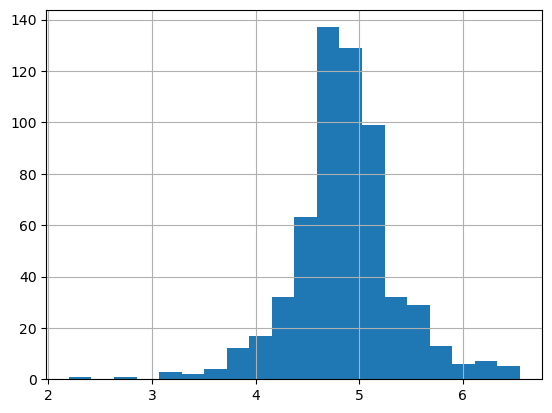

In [50]:
#將離散數值透過log 轉成常態分布，又名高斯分布
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<AxesSubplot:>

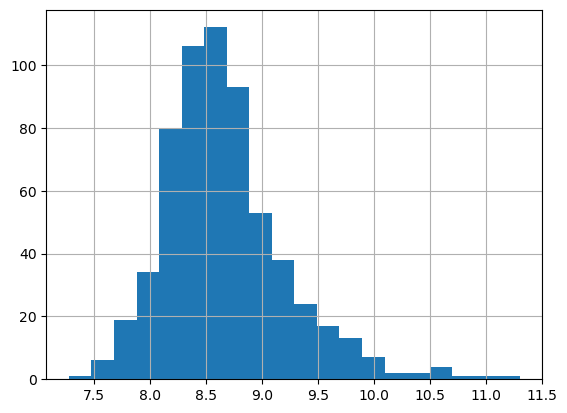

In [51]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome']=np.log(df['TotalIncome'])
df['TotalIncome'].hist(bins=20)

In [52]:
# fillna ==>用某一個特定值取代所有 nan
# inplace = True：直接对原始对象資料進行修改；
# inplace = False：不動原資料，修改结果放在新建的資料。
# mode()[0]==>眾數，就是出現频数最高的那个值
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log=df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

In [53]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
print(x[0])

['Male' 'No' '0' 'Graduate' 360.0 1.0 4.857444178729353 8.674025985443025]


In [54]:
y=df.iloc[:,12].values
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [55]:
Labelencoder_x=LabelEncoder()
Labelencoder_y=LabelEncoder()

In [56]:
print(x[0])
for i in range(0,5):
    x[:,i]=Labelencoder_x.fit_transform(x[:,i])
    x[:,7]=Labelencoder_x.fit_transform(x[:,7])
print(x[0])

['Male' 'No' '0' 'Graduate' 360.0 1.0 4.857444178729353 8.674025985443025]
[1 0 0 0 8 1.0 4.857444178729353 320]


In [57]:
print(y)
y=Labelencoder_y.fit_transform(y)
print(y)

['Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'N'
 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N'
 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y

In [58]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [59]:
print(X_test[0])

[1 0 0 0 8 1.0 4.430816798843313 394]


In [60]:
from sklearn.ensemble import RandomForestClassifier
RFclf=RandomForestClassifier()
RFclf.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
from sklearn import metrics
print(X_test[0])
y_pred=RFclf.predict(X_test)
print("Accroding to random forest classifier,the accuracy is ",metrics.accuracy_score(y_test,y_pred))
y_pred[0]

[1 0 0 0 8 1.0 4.430816798843313 394]
Accroding to random forest classifier,the accuracy is  0.7967479674796748


1

In [62]:
#input new data to predict
#['Male' 'No' '0' 'Graduate' 360.0 1.0 4.857444178729353 8.674025985443025]
#[  1     0    0     0         8   1.0 4.857444178729353 0.2]
import numpy as np
data= np.array([ 1 ,0, 0, 0,  180,  0,4.857444178729353 , 320]) 
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#X_data=ss.fit_transform(data.reshape(-1, 8))
X_data=data
print(X_data)
y_pred=RFclf.predict(X_data.reshape(-1, 8))
print(y_pred)

[  1.           0.           0.           0.         180.
   0.           4.85744418 320.        ]
[0]
